In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!pip install missingno

In [ ]:
## Coding for the Data 603 Project - Restaurant Inspection Analysis
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

**Load data in to DataFrames Format**

In [ ]:
inspect_df = pd.read_csv('/content/drive/Shareddrives/Data 603 Project/Dataset/FoodInspectionDataset.csv',low_memory=False)
review_df = pd.read_csv('/content/drive/Shareddrives/Data 603 Project/Dataset/YELP.Reviews.csv',)

# Exploring Data

In [ ]:
print("Number of rows in inspection data set:",inspect_df.shape[0])
print("Number of columns in inspection data set:",inspect_df.shape[1])
print("Number of rows in review data set:",review_df.shape[0])
print("Number of columns in review data set:",review_df.shape[1])

Number of rows in inspection data set: 637892
Number of columns in inspection data set: 26
Number of rows in review data set: 467105
Number of columns in review data set: 15


In [ ]:
inspect_df.head(2)

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,15-4-202.16,*,Non-Food Contact Surfaces,2013-02-15 12:19:42,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,16-4-501.11/.15,*,Dishwashng Facilities,2013-02-15 12:19:42,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"


In [ ]:
review_df.head(2)

,restaurant_name,restaurant_ID,review_date,reviewer_name,reviewer_origin,reviewer_profile,history_1,history_2,history_3,history_4,history_5,reviewer_friends,reviewer_reviews,reviewer_photos,reviewer_elite
0,100% Delicias,2,2019-11-30,Chad J.,"Pasadena, CA",https://www.yelp.com/user_details?userid=S3dQs...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100% Delicias,2,2018-07-16,Alex V.,"Boston, MA",https://www.yelp.com/user_details?userid=wMHEn...,2.0,0.0,0.0,0.0,13.0,1.0,15.0,4.0,0.0


In [ ]:
inspect_df['violdttm']

0         2013-02-15 12:19:42
1         2013-02-15 12:19:42
2         2013-02-15 12:19:42
3         2013-02-15 12:19:42
4         2013-02-15 12:19:42
                 ...         
637887    2020-03-11 13:53:43
637888    2020-03-11 13:53:43
637889    2020-11-24 11:17:35
637890    2021-01-28 12:53:26
637891    2021-01-28 12:53:26
Name: violdttm, Length: 637892, dtype: object

In [ ]:
review_years=list(review_df['review_date'])
inspect_years=list(inspect_df['violdttm'])

In [ ]:
review_years=[str(x)[0:4]for x in review_years]
inspect_years=[str(x)[0:4]for x in inspect_years]

In [ ]:
print(len(review_years),len(inspect_years))

467105 637892


In [ ]:
plot_years_review=set(review_years)
plot_years_inspect=set(inspect_years)

In [ ]:
print(len(plot_years_review),len(plot_years_inspect))

18 17


In [ ]:
inspect_years_dict={}
count=0
for x in plot_years_inspect:
  count=inspect_years.count(x)
  inspect_years_dict[x]=count

In [ ]:
review_years_dict={}
count=0
for x in plot_years_review:
  count=review_years.count(x)
  review_years_dict[x]=count

In [ ]:
inspect_years_dict

{' ': 35452,
 '2006': 8,
 '2007': 30224,
 '2008': 47014,
 '2009': 42799,
 '2010': 37419,
 '2011': 34967,
 '2012': 49005,
 '2013': 42579,
 '2014': 47362,
 '2015': 46261,
 '2016': 52715,
 '2017': 41322,
 '2018': 50960,
 '2019': 42642,
 '2020': 29761,
 '2021': 7402}

In [ ]:
inspect_years_dict.pop(' ')

35452

In [ ]:
inspect_years_dict

{'2006': 8,
 '2007': 30224,
 '2008': 47014,
 '2009': 42799,
 '2010': 37419,
 '2011': 34967,
 '2012': 49005,
 '2013': 42579,
 '2014': 47362,
 '2015': 46261,
 '2016': 52715,
 '2017': 41322,
 '2018': 50960,
 '2019': 42642,
 '2020': 29761,
 '2021': 7402}

In [ ]:
year_inspect=pd.DataFrame(list(inspect_years_dict.items()),columns=['Year','Data'])

In [ ]:
year_inspect['Year']=year_inspect['Year'].astype(int)
year_inspect['Data']=year_inspect['Data'].astype(int)

In [ ]:
year_inspect.dtypes

Year    int64
Data    int64
dtype: object

In [ ]:
review_years_dict

{'2004': 4,
 '2005': 1093,
 '2006': 3012,
 '2007': 6654,
 '2008': 11500,
 '2009': 15896,
 '2010': 21445,
 '2011': 27354,
 '2012': 27961,
 '2013': 31198,
 '2014': 39730,
 '2015': 45379,
 '2016': 50889,
 '2017': 55833,
 '2018': 58014,
 '2019': 55900,
 '2020': 14887,
 'nan': 356}

In [ ]:
review_years_dict.pop('nan')

356

In [ ]:
review_years_dict

{'2004': 4,
 '2005': 1093,
 '2006': 3012,
 '2007': 6654,
 '2008': 11500,
 '2009': 15896,
 '2010': 21445,
 '2011': 27354,
 '2012': 27961,
 '2013': 31198,
 '2014': 39730,
 '2015': 45379,
 '2016': 50889,
 '2017': 55833,
 '2018': 58014,
 '2019': 55900,
 '2020': 14887}

In [ ]:
year_review=pd.DataFrame(list(review_years_dict.items()),columns=['Year','Data'])

In [ ]:
year_review['Year']=year_review['Year'].astype(int)
year_review['Data']=year_review['Data'].astype(int)

In [ ]:
year_review=year_review.sort_values('Year')
year_inspect=year_inspect.sort_values('Year')

# Uncleaned data Vizuali 

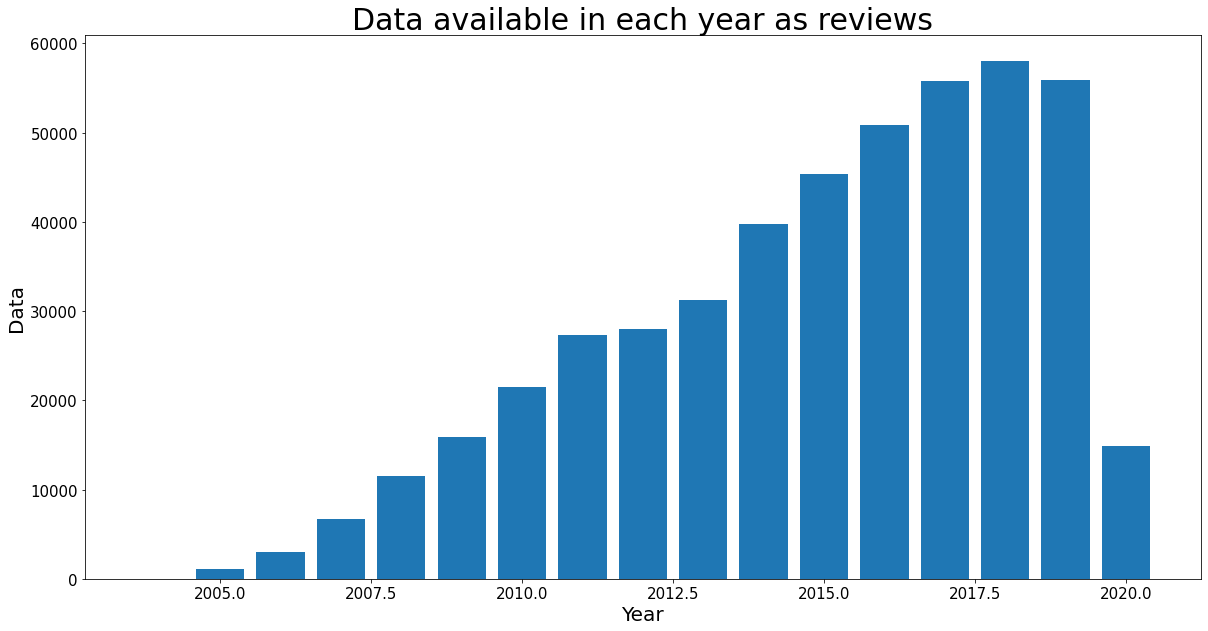

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(list(year_review['Year']),list(year_review['Data']))
plt.title('Data available in each year as reviews',fontsize=30)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Data',fontsize=20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

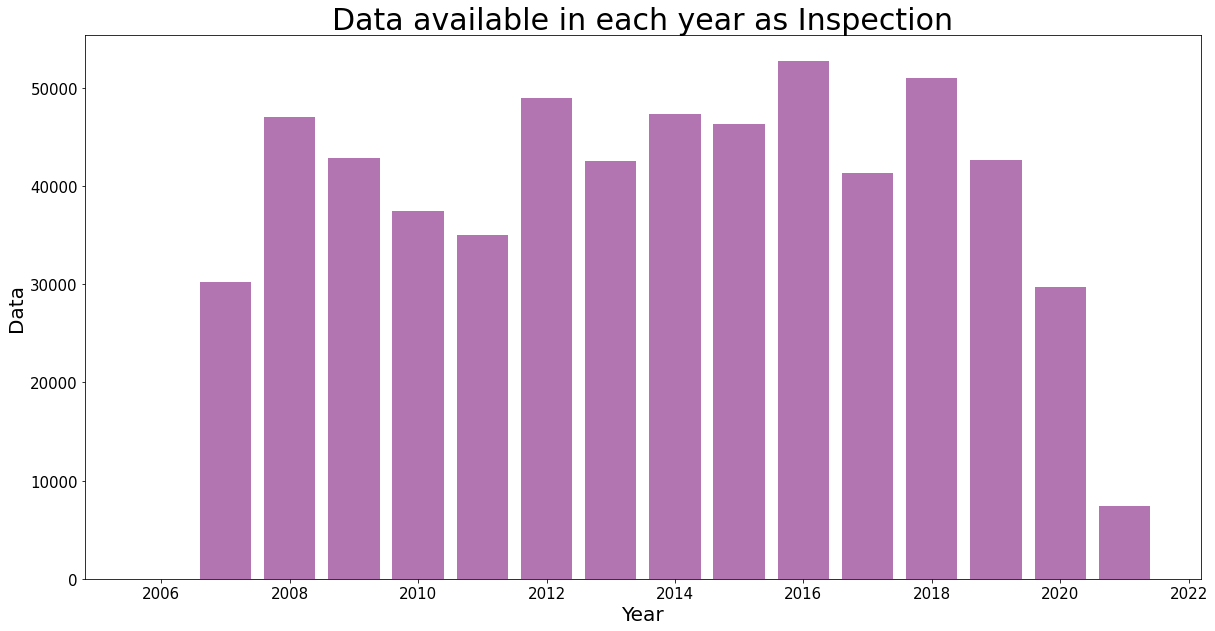

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(list(year_inspect['Year']),list(year_inspect['Data']),color = (0.5,0.1,0.5,0.6))
plt.title('Data available in each year as Inspection',fontsize=30)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Data',fontsize=20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

**NAN detection and reacting accordingly**

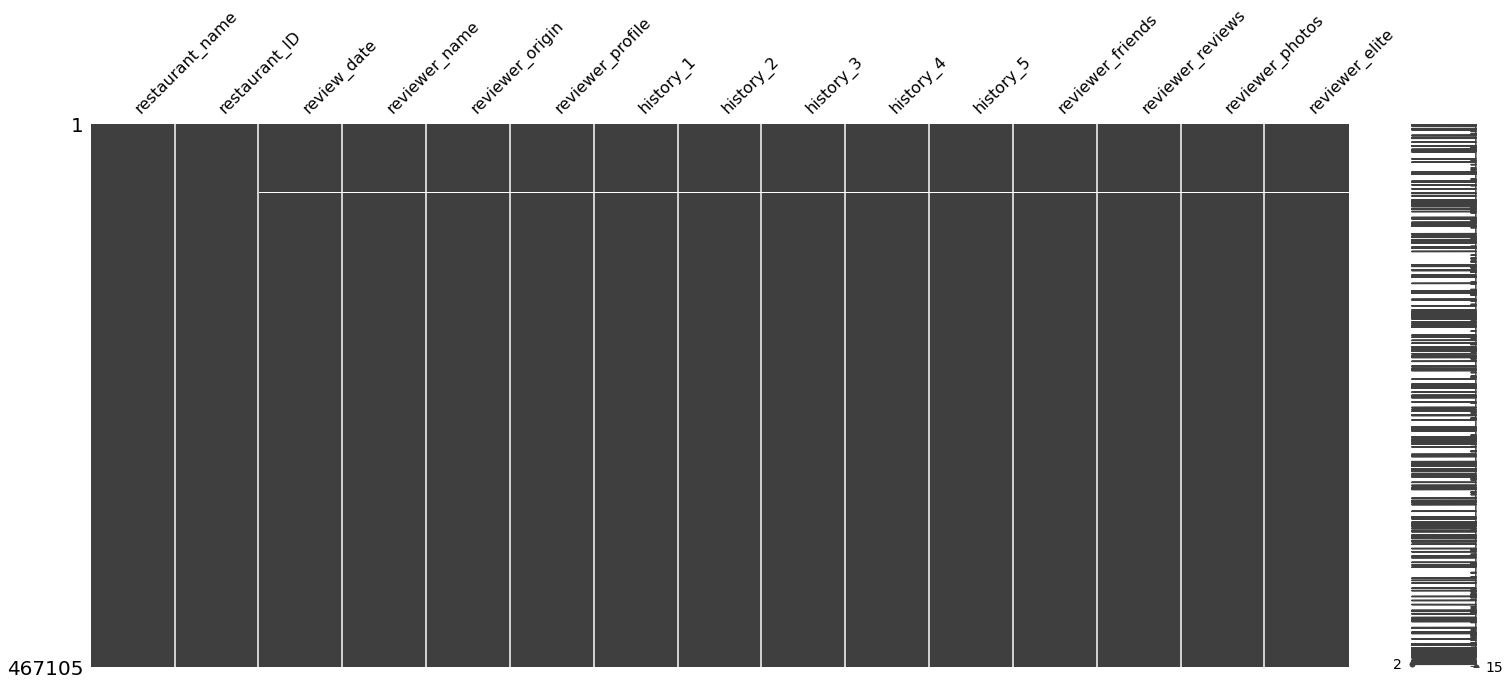

In [ ]:
msno.matrix(review_df)
plt.show()

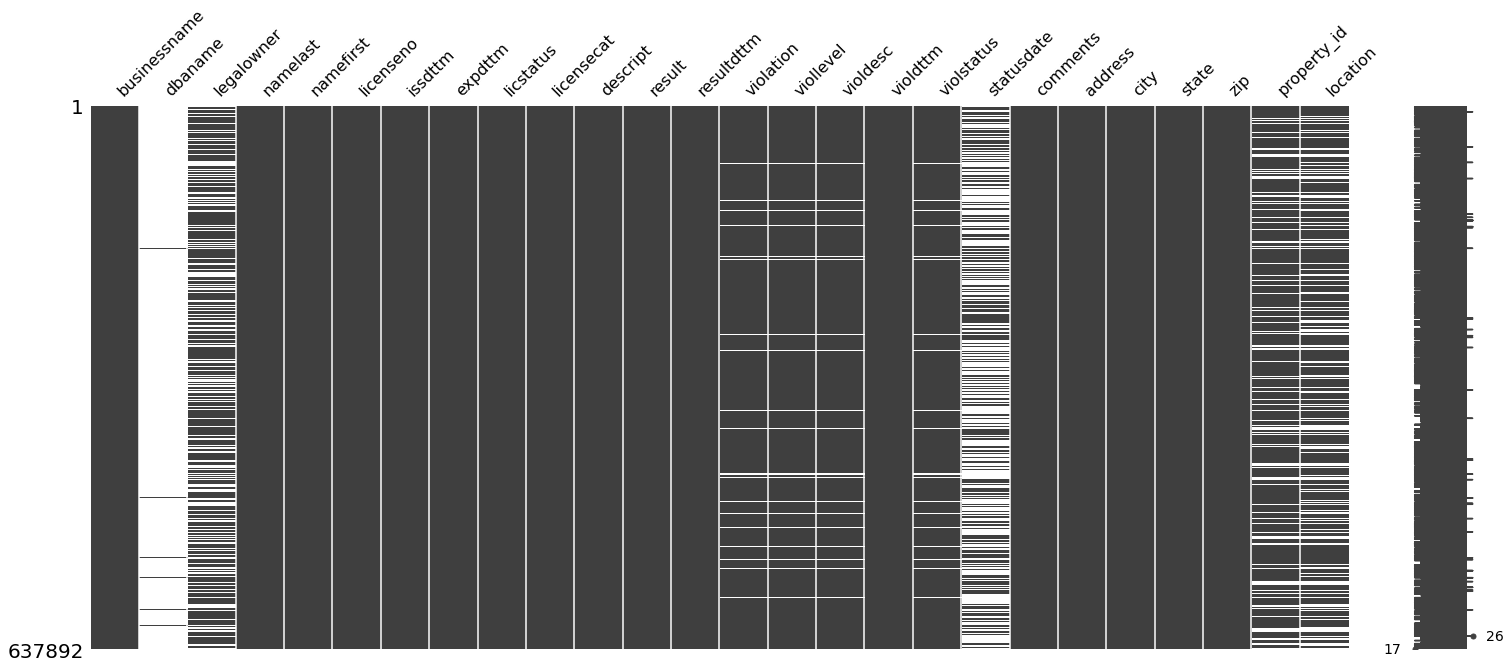

In [ ]:
msno.matrix(inspect_df)
plt.show()

In [ ]:
inspect_df=inspect_df.dropna(subset=['violation'])

In [ ]:
inspect_df.shape

(602443, 26)

In [ ]:
inspect_df.head(1)

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,15-4-202.16,*,Non-Food Contact Surfaces,2013-02-15 12:19:42,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"


# Function to display number of "Unique" values in each column of dataset.

In [ ]:
def num_unique_vals(data_frame):
  col_val_dict={}
  for i in data_frame.columns:
    num=data_frame[i].nunique()
    col_val_dict[i]=num
  return col_val_dict


In [ ]:
num_unique_vals(review_df)

{'history_1': 167,
 'history_2': 263,
 'history_3': 568,
 'history_4': 819,
 'history_5': 614,
 'restaurant_ID': 2664,
 'restaurant_name': 2348,
 'review_date': 5494,
 'reviewer_elite': 2,
 'reviewer_friends': 1577,
 'reviewer_name': 64687,
 'reviewer_origin': 11077,
 'reviewer_photos': 2704,
 'reviewer_profile': 192199,
 'reviewer_reviews': 1577}

# Function displaying Unique values in a column.

In [ ]:
def unique_vals(data_frame):
  col_val_dict={}
  for i in data_frame.columns:
    values=data_frame[i].unique()
    col_val_dict[i]=np.array(values)
  return col_val_dict

# Merge Data Sets:

In [ ]:
review_df.head(2)

,restaurant_name,restaurant_ID,review_date,reviewer_name,reviewer_origin,reviewer_profile,history_1,history_2,history_3,history_4,history_5,reviewer_friends,reviewer_reviews,reviewer_photos,reviewer_elite
0,100% Delicias,2,2019-11-30,Chad J.,"Pasadena, CA",https://www.yelp.com/user_details?userid=S3dQs...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100% Delicias,2,2018-07-16,Alex V.,"Boston, MA",https://www.yelp.com/user_details?userid=wMHEn...,2.0,0.0,0.0,0.0,13.0,1.0,15.0,4.0,0.0


In [ ]:
inspect_df.head(2)

,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,15-4-202.16,*,Non-Food Contact Surfaces,2013-02-15 12:19:42,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,16-4-501.11/.15,*,Dishwashng Facilities,2013-02-15 12:19:42,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"


In [ ]:
# Comparing Number of restaurants in both data sets
print("Total number of restaurants present in Reviews data set",review_df["restaurant_name"].nunique())
print("Total number of restaurants present in Inspection data set",inspect_df["businessname"].nunique())


Total number of restaurants present in Reviews data set 2348
Total number of restaurants present in Inspection data set 6387


Observation: Missing data of few restaurants is identified in Riviews data set , In order to maiantain uniform shape eliminating data of few absent restaurants data from Inspection data set

In [ ]:
list_inspect=list(inspect_df["businessname"].unique())
list_review=list(review_df["restaurant_name"].unique())

Extract common restaurants from both datasets

In [ ]:
common_list=[]
for i in range(0,len(list_review)):
  if list_review[i] in list_inspect:
    common_list.append(list_review[i])


In [ ]:
len(common_list)

680

In [ ]:
print("Common Restaurants are:")
print(common_list)

Common Restaurants are:
['2Twenty2', '49 Social', '753 South', 'Abby Lane', 'Acapulco Mexican Restaurant', 'Aceituna Grill', 'Addis Red Sea', 'Al Mercatino', 'Alcove', 'Ali Baba', 'Alibi', 'All Star Pizza Bar', 'Allston Diner', "Amelia's Taqueria", 'Americano Espresso Bar', 'Andalus Pizza & Cafe', "Andre's Cafe", "Anna's Cafe", "Anna's Taqueria", 'Aqua Pazza', 'Arboretum Grill', "Archie's Place", 'Ariana Restaurant', 'Article 24', 'Arya Trattoria', 'Ashburton Cafe', 'Asia Wok', 'Asian Too Express', 'Assaggio', 'Asta', 'Au Bon Pain', 'Avana Express Bar', 'Azama Grill', 'Back Bay Sandwich', 'Back Deck', 'Bailey & Sage', 'Bamboo Thai Restaurant', 'Bangkok Express', 'Bangkok Pinto', 'Bani Restaurant', 'Bar Louie', 'Bar Lyon', 'Bar Mercato', 'Bar Mezzana', 'Barracuda Tavern', 'Basho Express', 'Basho Japanese Brasserie', 'Bastille Kitchen', 'Bay Sweets', 'Bean & Leaf Cafe', 'Beantown Pastrami', 'Beantown Pho & Grill', 'Beantown Pub', 'Beijing Cafe', 'Bella Vista', "Benevento's", 'Bep Bui', "

In [ ]:
review_final=pd.DataFrame()
inspect_final=pd.DataFrame()
for i in common_list:
  rev=review_df[review_df['restaurant_name']==i]
  review_final=review_final.append(rev)
  ins=inspect_df[inspect_df['businessname']==i]
  inspect_final=inspect_final.append(ins)

In [ ]:
review_final.sample(5)

,restaurant_name,restaurant_ID,review_date,reviewer_name,reviewer_origin,reviewer_profile,history_1,history_2,history_3,history_4,history_5,reviewer_friends,reviewer_reviews,reviewer_photos,reviewer_elite
286341,Pho Basil,2400,2013-09-26,Dolores H.,"Boston, MA",https://www.yelp.com/user_details?userid=KtCus...,8.0,7.0,2.0,5.0,19.0,0.0,41.0,0.0,0.0
198863,Lambert's Marketplace,1728,2010-10-14,Erika K.,"Arlington, TX",https://www.yelp.com/user_details?userid=-7pYY...,18.0,26.0,40.0,42.0,53.0,68.0,179.0,13.0,0.0
375166,The Beehive,3166,2019-05-16,M. C.,"Boston, MA",https://www.yelp.com/user_details?userid=H3JSx...,0.0,0.0,1.0,0.0,18.0,0.0,19.0,0.0,0.0
190524,Kamakura,1636,2019-04-19,Colten N.,"Palo Alto, CA",https://www.yelp.com/user_details?userid=nPMTG...,2.0,0.0,0.0,0.0,3.0,2.0,5.0,0.0,0.0
212496,Local 149,1813,2012-04-11,Beth R.,"Boston, MA",https://www.yelp.com/user_details?userid=cLXPb...,10.0,25.0,131.0,179.0,48.0,223.0,393.0,110.0,0.0


In [ ]:
inspect_final=inspect_final.sample(10000)
review_final=review_final.sample(10000)

In [ ]:
inspect_final.shape

(10000, 26)

In [ ]:
print("Shape of inspection dataset",inspect_final.shape)
print("Shape of review data set",review_final.shape)

Shape of inspection dataset (10000, 26)
Shape of review data set (10000, 15)


In [ ]:
inspect_final=inspect_final.reset_index(drop=True)
review_final=review_final.reset_index(drop=True)

In [ ]:
inspect_final.shape


(10000, 26)

In [ ]:
review_final.head(5)

,restaurant_name,restaurant_ID,review_date,reviewer_name,reviewer_origin,reviewer_profile,history_1,history_2,history_3,history_4,history_5,reviewer_friends,reviewer_reviews,reviewer_photos,reviewer_elite
0,Piattini,2411,2016-01-30,Alexie O.,"Boston, MA",https://www.yelp.com/user_details?userid=cfDQf...,0.0,1.0,1.0,3.0,9.0,1.0,14.0,6.0,0.0
1,Menton,1993,2012-04-15,Tammy K.,"New York, NY",https://www.yelp.com/user_details?userid=0EwPO...,0.0,2.0,39.0,139.0,49.0,69.0,229.0,19.0,0.0
2,Tatte Bakery & Cafe,3110,2016-01-24,Ali E.,"Bronx, NY",https://www.yelp.com/user_details?userid=fj9oO...,2.0,1.0,1.0,19.0,7.0,18.0,30.0,24.0,0.0
3,Pizza Days,2433,2016-01-31,Ashley B.,"Hollywood, Los Angeles, CA",https://www.yelp.com/user_details?userid=lqR3P...,8.0,1.0,1.0,2.0,3.0,41.0,15.0,2.0,0.0
4,Menton,1993,2018-08-23,Real L.,"New York, NY",https://www.yelp.com/user_details?userid=etUAk...,7.0,0.0,0.0,1.0,5.0,0.0,13.0,0.0,0.0


In [ ]:
inspect_final = inspect_final.rename(columns={'businessname': 'restaurant_name'})

Object to time datatype

In [ ]:
inspect_final["violdttm"]=pd.to_datetime(inspect_final["violdttm"])

In [ ]:
inspect_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   restaurant_name  10000 non-null  object        
 1   dbaname          178 non-null    object        
 2   legalowner       6488 non-null   object        
 3   namelast         10000 non-null  object        
 4   namefirst        10000 non-null  object        
 5   licenseno        10000 non-null  int64         
 6   issdttm          10000 non-null  object        
 7   expdttm          10000 non-null  object        
 8   licstatus        10000 non-null  object        
 9   licensecat       10000 non-null  object        
 10  descript         10000 non-null  object        
 11  result           10000 non-null  object        
 12  resultdttm       10000 non-null  object        
 13  violation        10000 non-null  object        
 14  viollevel        10000 non-null  object

Considering data after year 2015

In [ ]:
# data after 2019 year for analysis
inspect_final=inspect_final[inspect_final['violdttm']>'2015-01-01 12:01:00']

In [ ]:
inspect_final.shape

(5896, 26)

In [ ]:
review_final["review_date"]=pd.to_datetime(review_final["review_date"])

In [ ]:
review_final=review_final[review_final['review_date']>'2015-01-01']

In [ ]:
review_final.shape

(6562, 15)

In [ ]:
new_df=review_final.merge(inspect_final, on='restaurant_name',)

In [ ]:
new_df.shape

(61528, 40)

In [ ]:
new_df["restaurant_name"].nunique()

499

# Main Data Frame Processing

In [ ]:
new_df=new_df.reset_index(drop=True)
new_df.head(2)

,restaurant_name,restaurant_ID,review_date,reviewer_name,reviewer_origin,reviewer_profile,history_1,history_2,history_3,history_4,history_5,reviewer_friends,reviewer_reviews,reviewer_photos,reviewer_elite,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,Piattini,2411,2016-01-30,Alexie O.,"Boston, MA",https://www.yelp.com/user_details?userid=cfDQf...,0.0,1.0,1.0,3.0,9.0,1.0,14.0,6.0,0.0,NaN,CHATAL ASSOCS LPS,JOSEPHINE OLIVIERO MEGWA,,21713,2012-01-10 12:52:50,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Pass,2017-06-13 13:47:21,36-6-501.11-.12,*,Improper Maintenance of Floors,2017-06-13 13:47:21,Pass,2017-06-14 08:48:56,Floors under and around equipment with soils a...,226 Newbury ST,Boston,MA,02116,101443.0,"(42.349710000, -71.081240000)"
1,Piattini,2411,2016-01-30,Alexie O.,"Boston, MA",https://www.yelp.com/user_details?userid=cfDQf...,0.0,1.0,1.0,3.0,9.0,1.0,14.0,6.0,0.0,NaN,CHATAL ASSOCS LPS,JOSEPHINE OLIVIERO MEGWA,,21713,2012-01-10 12:52:50,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2017-06-06 15:31:57,03-3-501.16,***,Hot Holding,2017-06-06 15:31:57,Fail,NaN,Marinara in hot holding unit at 103F. Unit on ...,226 Newbury ST,Boston,MA,02116,101443.0,"(42.349710000, -71.081240000)"


In [ ]:
zip_list=list(new_df['zip'].unique())
len(zip_list)

30

In [ ]:
url_list=list(new_df['reviewer_profile'].unique())
len(url_list)

5248

In [ ]:
url_list[45]

'https://www.yelp.com/user_details?userid=NNFfMkSb99wbaOul17PLzg'

In [ ]:
new_df['viollevel'] = [len(y)  for y in new_df['viollevel']]

In [ ]:
new_df['viollevel'].unique()

array([1, 3, 2])

In [ ]:
rest_list=new_df['restaurant_name'].unique()
print(len(rest_list))

499


Function to extract Url of Restaurant Profile, from data avaialble

In [ ]:
#import urllib.request as ur
from bs4 import BeautifulSoup
import requests
import re
def word_search(word_to_search,url):
  for pg in range(0,10):
    i=0
    url2=url+'&rec_pagestart='+str(i*10)
    response = requests.get(url2)
    soup = BeautifulSoup(response.content, "html5lib")
    alist=soup.find_all("a",{'class':'biz-name js-analytics-click'})
    for tag in alist:
      restname=tag.get_text().strip()
      if restname==word_to_search:
        tag_str=str(tag)
        tag_str_list=tag_str.split('=')
        link_str=tag_str_list[-1]
        link_str_list=str(link_str).split('>')
        final_link=str(link_str_list[0])[1:-1]
        rest_link='https://www.yelp.com'+final_link
        i=i+1
        return rest_link
        #response_new=requests.get(rest_link)
        #soup_rest= BeautifulSoup(response_new.content, "html5lib")
        #class_rest='i-stars__373c0__1T6rz i-stars--large-3-half__373c0__2z4jR border-color--default__373c0__30oMI overflow--hidden__373c0__2B0kz'
        #rating=soup.find_all("div",{'class':class_rest})
        #rating=str(rating).split('=')
        #return rating
  else:
   print("Url interrupt")

In [ ]:
text12=word_search('Bertucci’s Italian Restaurant','https://www.yelp.com/user_details_reviews_self?userid=o8vT2hNNCWdUuTW0032OCg&rec_pagestart=10')

Url interrupt


In [ ]:
!pip install requests

In [ ]:
text12=word_search('Bertucci’s Italian Restaurant','https://www.yelp.com/user_details_reviews_self?userid=o8vT2hNNCWdUuTW0032OCg&rec_pagestart=10')

Url interrupt


In [ ]:
list23=[3,3.5,4,5,4.5,2]

In [ ]:
pip install pyspark

In [ ]:

new_df['Stars'] = np.resize(list23,len(new_df))

In [ ]:
new_df.head()

,restaurant_name,restaurant_ID,review_date,reviewer_name,reviewer_origin,reviewer_profile,history_1,history_2,history_3,history_4,history_5,reviewer_friends,reviewer_reviews,reviewer_photos,reviewer_elite,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location,Stars
0,Piattini,2411,2016-01-30,Alexie O.,"Boston, MA",https://www.yelp.com/user_details?userid=cfDQf...,0.0,1.0,1.0,3.0,9.0,1.0,14.0,6.0,0.0,NaN,CHATAL ASSOCS LPS,JOSEPHINE OLIVIERO MEGWA,,21713,2012-01-10 12:52:50,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Pass,2017-06-13 13:47:21,36-6-501.11-.12,1,Improper Maintenance of Floors,2017-06-13 13:47:21,Pass,2017-06-14 08:48:56,Floors under and around equipment with soils a...,226 Newbury ST,Boston,MA,02116,101443.0,"(42.349710000, -71.081240000)",3.0
1,Piattini,2411,2016-01-30,Alexie O.,"Boston, MA",https://www.yelp.com/user_details?userid=cfDQf...,0.0,1.0,1.0,3.0,9.0,1.0,14.0,6.0,0.0,NaN,CHATAL ASSOCS LPS,JOSEPHINE OLIVIERO MEGWA,,21713,2012-01-10 12:52:50,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2017-06-06 15:31:57,03-3-501.16,3,Hot Holding,2017-06-06 15:31:57,Fail,NaN,Marinara in hot holding unit at 103F. Unit on ...,226 Newbury ST,Boston,MA,02116,101443.0,"(42.349710000, -71.081240000)",3.5
2,Piattini,2411,2016-01-30,Alexie O.,"Boston, MA",https://www.yelp.com/user_details?userid=cfDQf...,0.0,1.0,1.0,3.0,9.0,1.0,14.0,6.0,0.0,NaN,CHATAL ASSOCS LPS,JOSEPHINE OLIVIERO MEGWA,,21713,2012-01-10 12:52:50,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Pass,2017-06-13 13:47:21,15-4-202.16,1,Non-Food Contact Surfaces,2017-06-13 13:47:21,Pass,2017-06-14 08:48:56,Cold holding sandwich unit at 58F. Must be mai...,226 Newbury ST,Boston,MA,02116,101443.0,"(42.349710000, -71.081240000)",4.0
3,Piattini,2411,2016-01-30,Alexie O.,"Boston, MA",https://www.yelp.com/user_details?userid=cfDQf...,0.0,1.0,1.0,3.0,9.0,1.0,14.0,6.0,0.0,NaN,CHATAL ASSOCS LPS,JOSEPHINE OLIVIERO MEGWA,,21713,2012-01-10 12:52:50,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Pass,2015-06-03 11:24:51,31-5-204/05.11,3,Location Accessible,2015-06-03 11:24:51,Pass,2015-06-03 13:18:24,Hand sink blocked with trash barrel and contai...,226 Newbury ST,Boston,MA,02116,101443.0,"(42.349710000, -71.081240000)",5.0
4,Piattini,2411,2016-01-30,Alexie O.,"Boston, MA",https://www.yelp.com/user_details?userid=cfDQf...,0.0,1.0,1.0,3.0,9.0,1.0,14.0,6.0,0.0,NaN,CHATAL ASSOCS LPS,JOSEPHINE OLIVIERO MEGWA,,21713,2012-01-10 12:52:50,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Pass,2019-11-12 14:50:08,590.004/4-203.12-PF,2,Temperature Measuring Devices Ambient Air and...,2019-11-12 14:50:08,Pass,2019-11-12 15:45:38,Broken thermometer in sandwich unit - prep/coo...,226 Newbury ST,Boston,MA,02116,101443.0,"(42.349710000, -71.081240000)",4.5


In [ ]:
new_df.drop_duplicates(subset = ['restaurant_name'], keep = 'first', inplace = True) 

In [ ]:
new_df.head()

,restaurant_name,restaurant_ID,review_date,reviewer_name,reviewer_origin,reviewer_profile,history_1,history_2,history_3,history_4,history_5,reviewer_friends,reviewer_reviews,reviewer_photos,reviewer_elite,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location,Stars
0,Piattini,2411,2016-01-30,Alexie O.,"Boston, MA",https://www.yelp.com/user_details?userid=cfDQf...,0.0,1.0,1.0,3.0,9.0,1.0,14.0,6.0,0.0,NaN,CHATAL ASSOCS LPS,JOSEPHINE OLIVIERO MEGWA,,21713,2012-01-10 12:52:50,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Pass,2017-06-13 13:47:21,36-6-501.11-.12,1,Improper Maintenance of Floors,2017-06-13 13:47:21,Pass,2017-06-14 08:48:56,Floors under and around equipment with soils a...,226 Newbury ST,Boston,MA,02116,101443.0,"(42.349710000, -71.081240000)",3.0
210,Tatte Bakery & Cafe,3110,2016-01-24,Ali E.,"Bronx, NY",https://www.yelp.com/user_details?userid=fj9oO...,2.0,1.0,1.0,19.0,7.0,18.0,30.0,24.0,0.0,NaN,ROCKWOOD ABBEY FEE LLC,Tatte Holding LLC,Att: Accounts Payable,345202,2018-01-16 13:12:18,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2020-03-06 12:22:57,590.004/4-101.11-P,3,Characteristics-Materials for Construction and...,2020-03-06 12:22:57,Fail,NaN,Storing TCS food on a refrigeration/sandwich p...,399 Boylston ST,Boston,MA,02116,18319.0,"(42.351790000, -71.072090000)",3.0
1597,Pizza Days,2433,2016-01-31,Ashley B.,"Hollywood, Los Angeles, CA",https://www.yelp.com/user_details?userid=lqR3P...,8.0,1.0,1.0,2.0,3.0,41.0,15.0,2.0,0.0,NaN,AND DEVELOPMENT LLC,Pizza Days Inc.,Hakki Dengizli,68671,2012-01-11 13:04:50,2021-12-31 23:59:00,Active,FT,Eating & Drinking w/ Take Out,HE_Pass,2018-08-17 14:30:16,22-4-601/602.11,2,Food Contact Surfaces Clean,2018-08-17 14:30:16,Pass,2018-08-17 15:20:21,Can opener very soiled with dried up food debr...,101 Brighton AVE,Allston,MA,02134,20067.0,"(42.353081000, -71.130624000)",3.5
1717,Yamato II,3573,2018-04-19,Shain O.,"Boston, MA",https://www.yelp.com/user_details?userid=PGD0Y...,9.0,39.0,56.0,48.0,30.0,14.0,181.0,53.0,1.0,NaN,,Jiang,Ming,137896,2015-06-30 08:46:46,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Filed,2018-05-24 08:28:17,33-5-501.13-.17,1,Adequate Number Frequency Vermin Proof,2018-05-24 08:28:17,Pass,2018-05-29 08:43:34,Provide covered recepticle in handicapped rest...,545 Boylston ST,Boston,MA,02116,193086.0,"(42.350810000, -71.075810000)",3.5
3061,The Bebop,3165,2019-04-22,Tom S.,"Princeton, NJ",https://www.yelp.com/user_details?userid=KpAIf...,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,NaN,NaN,McCarthy,Thomas,310676,2017-06-15 08:17:15,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Pass,2018-02-16 10:29:13,08-3-305-307.11,1,Food Protection,2018-02-16 10:29:13,Pass,2018-02-26 10:39:19,Foods stored in large containers on floor of w...,1116 Boylston ST,Boston,MA,02215,351728.0,NaN,3.5


In [ ]:
new_df=new_df.reset_index(drop=True)
new_df.head(2)

,restaurant_name,restaurant_ID,review_date,reviewer_name,reviewer_origin,reviewer_profile,history_1,history_2,history_3,history_4,history_5,reviewer_friends,reviewer_reviews,reviewer_photos,reviewer_elite,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location,Stars
0,Piattini,2411,2016-01-30,Alexie O.,"Boston, MA",https://www.yelp.com/user_details?userid=cfDQf...,0.0,1.0,1.0,3.0,9.0,1.0,14.0,6.0,0.0,NaN,CHATAL ASSOCS LPS,JOSEPHINE OLIVIERO MEGWA,,21713,2012-01-10 12:52:50,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Pass,2017-06-13 13:47:21,36-6-501.11-.12,1,Improper Maintenance of Floors,2017-06-13 13:47:21,Pass,2017-06-14 08:48:56,Floors under and around equipment with soils a...,226 Newbury ST,Boston,MA,02116,101443.0,"(42.349710000, -71.081240000)",3.0
1,Tatte Bakery & Cafe,3110,2016-01-24,Ali E.,"Bronx, NY",https://www.yelp.com/user_details?userid=fj9oO...,2.0,1.0,1.0,19.0,7.0,18.0,30.0,24.0,0.0,NaN,ROCKWOOD ABBEY FEE LLC,Tatte Holding LLC,Att: Accounts Payable,345202,2018-01-16 13:12:18,2021-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2020-03-06 12:22:57,590.004/4-101.11-P,3,Characteristics-Materials for Construction and...,2020-03-06 12:22:57,Fail,NaN,Storing TCS food on a refrigeration/sandwich p...,399 Boylston ST,Boston,MA,02116,18319.0,"(42.351790000, -71.072090000)",3.0


# Spark Introduction 

Installation and Environment setup

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-2.4.1/spark-2.4.1-bin-hadoop2.7.tgz 
! tar -xf spark-2.4.1-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" 
os.environ["SPARK_HOME"] = "/content/spark-2.4.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext 
sc = SparkContext.getOrCreate()

In [ ]:
senti_ana=new_df[['restaurant_name','viollevel','Stars','reviewer_profile','zip']]

In [ ]:
# Dump data into Mongodb

In [ ]:
from pymongo import MongoClient
client = MongoClient()
db = client.test 
col = db.col


def createDocsFromDF(df, collection = None, insertToDB=False):
    docs = [] 
    fields = [col for col in df.columns]
    for i in range(len(df)):
        doc = {col:df[col][i] for col in df.columns if col != 'index'}
        for key, val in doc.items():
            if type(val) == np.int64:
                doc[key] = int(val)
            if type(val) == np.float64:
                doc[key] = float(val)
            if type(val) == np.bool_:
                doc[key] = bool(val)
        docs.append(doc) 
    if insertToDB and collection:
        db.collection.insert_many(docs)
    return docs 

In [ ]:
data_mongod=createDocsFromDF(senti_ana)

In [ ]:
# Mongodb collections
data_mongod[0:10]

[{'Stars': 3.0,
  'restaurant_name': 'Piattini',
  'reviewer_profile': 'https://www.yelp.com/user_details?userid=cfDQfMATC3Rr98VtS7LDzA',
  'viollevel': 1,
  'zip': '02116'},
 {'Stars': 3.0,
  'restaurant_name': 'Tatte Bakery & Cafe',
  'reviewer_profile': 'https://www.yelp.com/user_details?userid=fj9oOXdfiSEdhUtlB4t8Zg',
  'viollevel': 3,
  'zip': '02116'},
 {'Stars': 3.5,
  'restaurant_name': 'Pizza Days',
  'reviewer_profile': 'https://www.yelp.com/user_details?userid=lqR3P2AD_p_jcAWwJ8Im6A',
  'viollevel': 2,
  'zip': '02134'},
 {'Stars': 3.5,
  'restaurant_name': 'Yamato II',
  'reviewer_profile': 'https://www.yelp.com/user_details?userid=PGD0YwdRS57zAXZmj1OkQQ',
  'viollevel': 1,
  'zip': '02116'},
 {'Stars': 3.5,
  'restaurant_name': 'The Bebop',
  'reviewer_profile': 'https://www.yelp.com/user_details?userid=KpAIfnPEeRiBHEpa5i8gFA',
  'viollevel': 1,
  'zip': '02215'},
 {'Stars': 3.0,
  'restaurant_name': 'Bella Vista',
  'reviewer_profile': 'https://www.yelp.com/user_details?u

In [ ]:
senti_ana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   restaurant_name   499 non-null    object 
 1   viollevel         499 non-null    int64  
 2   Stars             499 non-null    float64
 3   reviewer_profile  499 non-null    object 
 4   zip               499 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.6+ KB


In [ ]:
# Calculating score of each restaurant from Violation level and review stars

In [ ]:
senti_ana["score"]=senti_ana["Stars"]-senti_ana["viollevel"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
senti_ana.head()

,restaurant_name,viollevel,Stars,reviewer_profile,zip,score
0,Piattini,1,3.0,https://www.yelp.com/user_details?userid=cfDQf...,02116,2.0
1,Tatte Bakery & Cafe,3,3.0,https://www.yelp.com/user_details?userid=fj9oO...,02116,0.0
2,Pizza Days,2,3.5,https://www.yelp.com/user_details?userid=lqR3P...,02134,1.5
3,Yamato II,1,3.5,https://www.yelp.com/user_details?userid=PGD0Y...,02116,2.5
4,The Bebop,1,3.5,https://www.yelp.com/user_details?userid=KpAIf...,02215,2.5


In [ ]:
spark = SparkSession \
    .builder \
    .appName("how to read csv file") \
    .getOrCreate()


In [ ]:
sparkDF=spark.createDataFrame(senti_ana)

In [ ]:
sparkDF.show(5)

+-------------------+---------+-----+--------------------+-----+-----+
|    restaurant_name|viollevel|Stars|    reviewer_profile|  zip|score|
+-------------------+---------+-----+--------------------+-----+-----+
|           Piattini|        1|  3.0|https://www.yelp....|02116|  2.0|
|Tatte Bakery & Cafe|        3|  3.0|https://www.yelp....|02116|  0.0|
|         Pizza Days|        2|  3.5|https://www.yelp....|02134|  1.5|
|          Yamato II|        1|  3.5|https://www.yelp....|02116|  2.5|
|          The Bebop|        1|  3.5|https://www.yelp....|02215|  2.5|
+-------------------+---------+-----+--------------------+-----+-----+
only showing top 5 rows



In [ ]:
sparkDF.printSchema()

root
 |-- restaurant_name: string (nullable = true)
 |-- viollevel: long (nullable = true)
 |-- Stars: double (nullable = true)
 |-- reviewer_profile: string (nullable = true)
 |-- zip: string (nullable = true)
 |-- score: double (nullable = true)



In [ ]:
from pyspark.sql.functions import udf

In [ ]:
# Classification of Restaurants status for recommendations 

In [ ]:
def score_to_review(value):
   if  value >= 3: 
     return 'Highly recommended '
   elif value >=2 and value <3: 
     return 'Average'
   elif value >=1 and value <2:
     return 'Bad'
   else:
     return 'Never Visit'

In [ ]:
udfValueToGrade = udf(score_to_review)
restdata = sparkDF.withColumn("report", udfValueToGrade("score"))
restdata.show()

+--------------------+---------+-----+--------------------+-----+-----+-------------------+
|     restaurant_name|viollevel|Stars|    reviewer_profile|  zip|score|             report|
+--------------------+---------+-----+--------------------+-----+-----+-------------------+
|            Piattini|        1|  3.0|https://www.yelp....|02116|  2.0|            Average|
| Tatte Bakery & Cafe|        3|  3.0|https://www.yelp....|02116|  0.0|        Never Visit|
|          Pizza Days|        2|  3.5|https://www.yelp....|02134|  1.5|                Bad|
|           Yamato II|        1|  3.5|https://www.yelp....|02116|  2.5|            Average|
|           The Bebop|        1|  3.5|https://www.yelp....|02215|  2.5|            Average|
|         Bella Vista|        3|  3.0|https://www.yelp....|02113|  0.0|        Never Visit|
|             Pauli's|        2|  5.0|https://www.yelp....|02113|  3.0|Highly recommended |
|        Thinking Cup|        1|  5.0|https://www.yelp....|02113|  4.0|Highly re

In [ ]:
# Dataframe column to rdd

In [ ]:
views_rdd = restdata.select("report").rdd.flatMap(lambda x:x)

In [ ]:
views_rdd1=views_rdd.map(lambda word : (word,1))

In [ ]:
views_rdd1.take(2)

[('Average', 1), ('Never Visit', 1)]

In [ ]:
views_rdd2=views_rdd1.reduceByKey(lambda x,y : (x+y))

In [ ]:
viz_list=views_rdd2.take(4)

In [ ]:
list_report=[]
list_count=[]
for i in range (0,len(viz_list)):
  list_report.append(viz_list[i][0])
  list_count.append(viz_list[i][1])

# Outcomes plot

In [ ]:
plot_df=pd.DataFrame()
plot_df["Report"]=list_report
plot_df["Count"]=list_count

In [ ]:
plot_df

,Report,Count
0,Bad,100
1,Average,179
2,Never Visit,47
3,Highly recommended,173


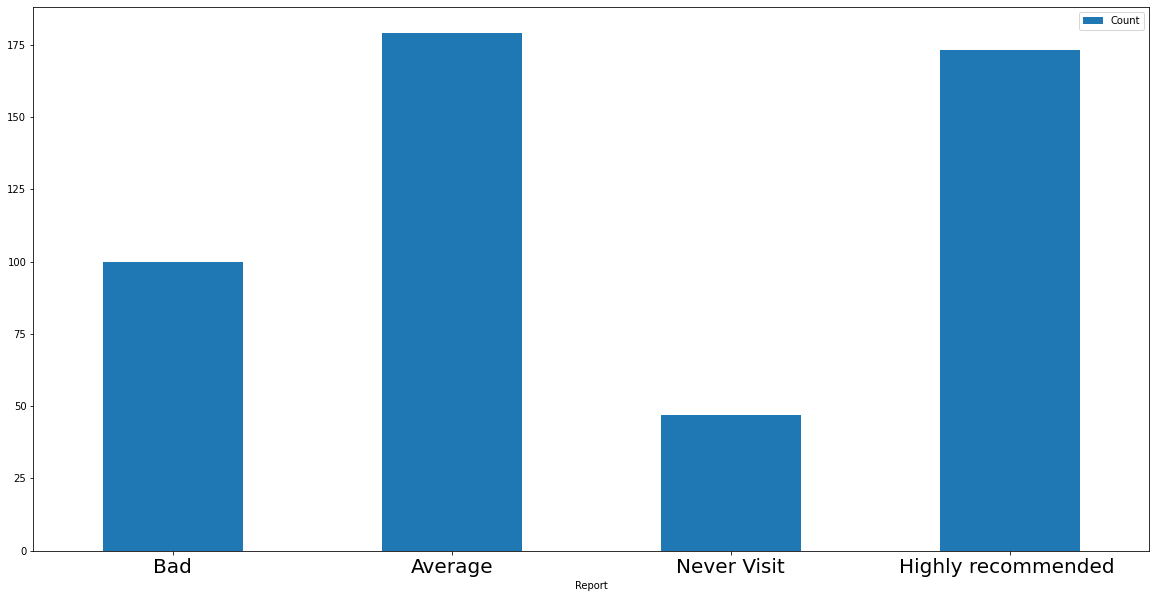

In [ ]:
plot_df.plot.bar(x='Report',rot=0,figsize=(20,10))
plt.xticks(fontsize=20)
plt.show()

In [ ]:
pandasDF = restdata.toPandas()

In [ ]:
pandasDF.head()

,restaurant_name,viollevel,Stars,reviewer_profile,zip,score,report
0,Piattini,1,3.0,https://www.yelp.com/user_details?userid=cfDQf...,02116,2.0,Average
1,Tatte Bakery & Cafe,3,3.0,https://www.yelp.com/user_details?userid=fj9oO...,02116,0.0,Never Visit
2,Pizza Days,2,3.5,https://www.yelp.com/user_details?userid=lqR3P...,02134,1.5,Bad
3,Yamato II,1,3.5,https://www.yelp.com/user_details?userid=PGD0Y...,02116,2.5,Average
4,The Bebop,1,3.5,https://www.yelp.com/user_details?userid=KpAIf...,02215,2.5,Average


In [ ]:
pandasDF['zip'].unique()

array(['02116', '02134', '02215', '02113', '02129', '02114', '02109',
       '02111', '02130', '02135', '02120', '02210', '02118', '02131',
       '02108', '02115', '02110', '02128', '02127', '02122', '02124',
       '02136', '02467', '02199', '02132', '02140', '02125', '02119',
       '02126', '02121'], dtype=object)

# Conclusion and results

Function that returs Restaurants with their staus as recommendations for an input zip code location

In [ ]:
def rest_report(zip,df=pandasDF):
   df_zip=df[df['zip']==zip]
   df_zip=df_zip.reset_index(drop=True)
   df_zip=df_zip[['restaurant_name','report']]
   print("Restaurant and  their Statuts at Location(zipcode):"+str(zip))
   for i in range (0,df_zip.shape[0]):
     print(df_zip['restaurant_name'].iloc[i]+" "+':'+" "+df_zip['report'].iloc[i])
   #return df_zip



In [ ]:
rest_report('02111',pandasDF)

Restaurant and  their Statuts at Location(zipcode):02111
Shojo : Highly recommended 
Quic Pic BBQ : Highly recommended 
Boston Kitchen Pizza : Never Visit
Pho Pasteur : Average
Back Deck : Bad
Spicy World : Never Visit
Stoddard's Fine Food & Ale : Bad
Hong Kong Eatery : Highly recommended 
Five Spices House : Bad
China Pearl Restaurant : Average
Wing's Kitchen : Highly recommended 
Cafe 26 : Highly recommended 
Jook Sing Cafe : Highly recommended 
Irashai Sushi and Teriyaki : Highly recommended 
Clay Pot Cafe : Average
Double Chin : Average
Potluck Cafe : Bad
Bubor Cha Cha : Bad
Tora Japanese Restaurant : Highly recommended 
Hot Pot Buffet : Highly recommended 
Moon Flower House : Highly recommended 
Chinatown Cafe : Highly recommended 
Chicken and Rice Guys : Highly recommended 
Shabu-Zen : Highly recommended 
Su Su Gourmet : Bad
Dumpling King : Average
49 Social : Highly recommended 
Gourmet China House : Never Visit
Kaze Shabu Shabu : Average
Bean & Leaf Cafe : Average
Boom Crispy C